In [2]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
from monty.serialization import loadfn, dumpfn
import json

In [4]:
MODEL = "uma"

In [5]:
supercell_size = 10.1

In [6]:
complete_energies = loadfn(f'../../data/{MODEL}/{MODEL}_corrected_doped_defect_energies_{supercell_size}A.json')

Defect formation energy = energy of defect supercell *min energy site* + Al atom chem potential - non defect supercell - Cr atom chem potential

In [7]:
for key in complete_energies.keys():
    complete_energies[key]['defect formation energy'] = {}
    defect_supercell_e = complete_energies[key]['minimum energy site']['energy']
    supercell_e = complete_energies[key]['defects']['supercell']['energy'] # pristine supercell
    formation_energy = {}
    for key1 in complete_energies[key]['competing phases']['chemical potentials']['limits'].keys():
        defect_energy = defect_supercell_e + complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Al'] - supercell_e - complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Cr']
        formation_energy[key1] = defect_energy
    complete_energies[key]['defect formation energy'] = formation_energy

In [8]:
dumpfn(complete_energies, f'../data/{MODEL}/{MODEL}_corrected_calculated_defect_formation_energies_{supercell_size}A.json')

In [31]:
complete_energies = loadfn(f'../data/{MODEL}/{MODEL}_corrected_calculated_defect_formation_energies_{supercell_size}A.json')

In [23]:
for key in complete_energies.keys():
    pretty = json.dumps(complete_energies[key]['defect formation energy'], indent=1)
    print(pretty)

{
 "Al(PO3)3-AlPO4-P-CrP4": 2.2218420193764477,
 "Al(PO3)3-P2O5-P-CrP4": 0.1779020193766545,
 "Al(PO3)3-AlPO4-O2-Cr(PO3)3": 0.07084201937649226,
 "Al(PO3)3-P2O5-O2-Cr(PO3)3": 0.07087201937654264
}
{
 "LiAl3-LiAlO2-Al-Al45Cr7": 5.64609466586081,
 "LiAl3-LiAlO2-LiAl-Al45Cr7": 5.59039466586076,
 "LiAl5O8-LiAlO2-Al-Al45Cr7": 5.64609466586081,
 "LiAl5O8-LiAlO2-LiO8-Li2CrO4": 0.6002446658607816,
 "Li3Al2-LiAlO2-LiAl-Al3Cr": 4.771414665860847,
 "Li3Al2-Li5AlO4-LiAlO2-AlCr2": 4.757984665860855,
 "Li2O2-LiAlO2-LiO8-Li2CrO4": 0.9973846658608085,
 "Li2O2-Li5AlO4-LiAlO2-Li2CrO4": 0.9378646658608041
}
{
 "AlClO-Cl2-Al2O3-CrCl3": 2.8106677884190017,
 "AlClO-AlCl3-Cl2-CrCl3": 2.8798877884190315,
 "AlClO-Al-Al2O3-Al45Cr7": 5.229857788419006,
 "AlClO-AlCl3-Al-Al45Cr7": 5.229857788419006
}
{
 "SmAlO3-SmAl3-SmAl2-AlCr2": 4.715655847501402,
 "SmAlO3-Sm4Al2O9-SmAl2-AlCr2": 4.685085847501471,
 "SmAlO3-SmAl3-Sm3Al5O12-AlCr2": 4.7534958475014815,
 "SmAlO3-Sm3Al5O12-O2-SmCrO4": 0.8850558475014694,
 "SmAlO3-Sm4

In [32]:
#plot of min that includes negatives
mfe = []
compounds = []
for key, val in complete_energies.items():
    compounds.append(complete_energies[key]['formula'])
    min_key = min(val['defect formation energy'], key=val['defect formation energy'].get)
    min_value = complete_energies[key]['defect formation energy'][min_key]
    mfe.append(val['defect formation energy'][min_key])

In [25]:
import numpy as np
import matplotlib.pyplot as plt

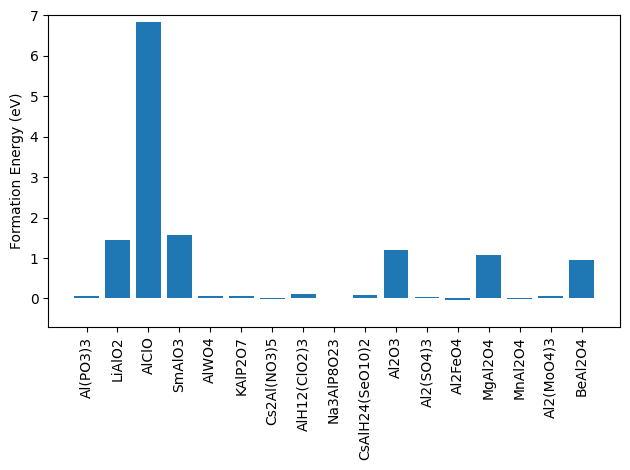

In [33]:
fig, ax = plt.subplots()
bars = ax.bar(compounds, mfe)  # Assuming you have these lists already
Al = 'Al'
# Add labels on top of each bar
# ax.set_title(f"Minimum Formation Energy of Cr$_A$$_l$ Substitution Defect with Corrections, {supercell_size}Å supercell with the {MODEL} model")
ax.set_ylabel("Formation Energy (eV)")
plt.ylim(-0.7, 7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"../../figures/{MODEL}/{MODEL}_corrected_min_defect_formation_energies_{supercell_size}A.png", dpi=300, bbox_inches='tight')
plt.show()